In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize']=(9,5)
mpl.rcParams['figure.dpi']=100

In [39]:
num_pts=100  #always give a var name to numbers, always set seed for random numbers
np.random.seed(42)
xs=np.random.random((num_pts,))  #virgül koyduk çünkü random functionı tuple çağırır ve virgül koymazsak parantezi de objeye dahil sanar.
noise_level=0.3
es=np.random.random(num_pts)*noise_level
m=2.71828
b=3.14159
ys=m*xs+b+es   #regression equation for sample data


Text(0.5, 1.0, 'Synthetic Linear Data')

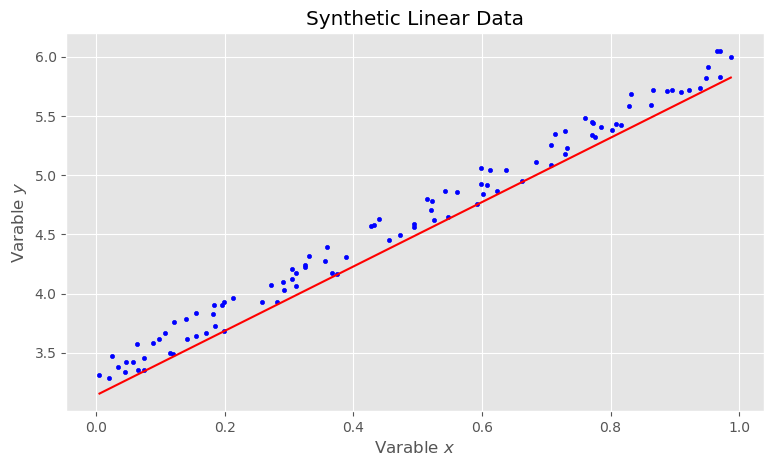

In [40]:
fig, ax=plt.subplots()
ax.scatter(xs,ys,color='b', marker='.')
ax.plot([xs.min(), xs.max()], [m*xs.min()+b, m*xs.max()+b], 'r-')
ax.set_xlabel('Varable $x$')
ax.set_ylabel('Varable $y$')
ax.set_title('Synthetic Linear Data')

In [41]:
X=np.vstack([xs,np.ones(len(xs))]).T
X.shape

(100, 2)

In [42]:
Y=ys.reshape((len(ys),1))
Y.shape

(100, 1)

In [43]:
Chat=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))  #matrix multiplication

In [44]:
print('m=', Chat[0], 'b=', Chat[1])  #close to real values, ok

m= [2.70822051] b= [3.2956693]


In [45]:
yshat=np.dot(X, Chat)  #predicted value
yshat.shape

(100, 1)

In [46]:
rmse=np.sqrt(((Y-yshat)**2).sum()*(1/num_pts))

In [47]:
rmse

0.08744192204506013

In [49]:
(Y-yshat).mean() #this is bias, so small, unb,ased?

-6.217248937900877e-17

Numpy Linear Regression

In [50]:
m_numpy, b_numpy = np.linalg.lstsq(X,Y,rcond=None)[0]
print("m={}, b={}".format(m_numpy, b_numpy))

m=[2.70822051], b=[3.2956693]


In [51]:
from sklearn.linear_model import LinearRegression 

In [52]:
reg=LinearRegression()  #regressor

In [53]:
reg.fit(xs.reshape(len(xs),1), ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
print("m={}, b={}".format(reg.coef_[0], reg.intercept_))

m=2.708220506836114, b=3.2956692969203103


In [55]:
yhat_sk=reg.predict(xs.reshape(len(xs),1))

In [61]:
rmse_sk=np.sqrt(((Y-yhat_sk.reshape(Y.shape))**2).sum()*(1/num_pts))

In [62]:
rmse_sk

0.08744192204506004

In [63]:
yhat_sk.max(), yhat_sk.min(), yshat.max(), yshat.min()

(5.968376736550503, 3.310624407755601, 5.9683767365505, 3.310624407755605)

In [64]:
yhat_sk.shape

(100,)

In [65]:
Y.shape

(100, 1)

In [66]:
reg.score(xs.reshape(len(xs),1),ys)

0.9882413851695379

with statsmodels

In [67]:
import statsmodels.api as sm

In [68]:
model=sm.OLS(ys,X)
results=model.fit()
print(results.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000002910127E7F0>>


In [69]:
from sklearn.datasets import load_boston
import pandas as pd
boston=load_boston()

In [70]:
bos=pd.DataFrame(boston.data,columns=boston.feature_names)

In [71]:
bos['PRICE']=boston.target

In [72]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [73]:
lm=LinearRegression()

In [74]:
lm.fit(bos.iloc[:,:-1],bos['PRICE']) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
Y_pred=lm.predict(bos.iloc[:,:-1])

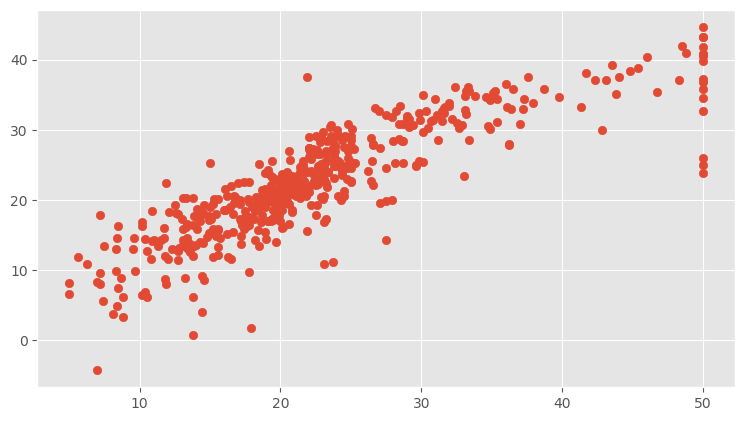

In [76]:
plt.scatter(bos['PRICE'], Y_pred)  #if prediction would be perfect, we see the dots on a diagonal line